In [76]:
import numpy as np
import pandas as pd
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
from scipy.special import factorial

In [80]:
def filter_coef(num_dados, grau, derivada=0):
    assert num_dados % 2 ==1
    M = (num_dados - 1)/2
    
    A = np.zeros((num_dados, grau))

    for n in range(A.shape[0]):
        for i in range(A.shape[1]):
            A[n, i] = (n-M)**i

    H = np.linalg.inv(A.transpose() @ A) @ A.transpose()

    h = H[derivada, :]*factorial(derivada)
    return h


# Frequency response

In [81]:
M = 16
N = 12

df = pd.DataFrame()
for N in range(0, M-1, 4):
    num_dados = 2*M + 1
    grau = N + 1

    h = filter_coef(num_dados=num_dados, grau=grau)
    res = np.convolve([int(i==0) for i in range(-200, 201)], h)

    h = fftshift(fft(res))
    f = fftshift(fftfreq(h.shape[0]))
    h_db = 10*np.log(np.abs(h))
    

    _df = pd.DataFrame({"freq": f*2,
                        "h_db": h_db})
    _df["N"] = N
    _df["M"] = M
    df = pd.concat([df, _df], ignore_index=True)

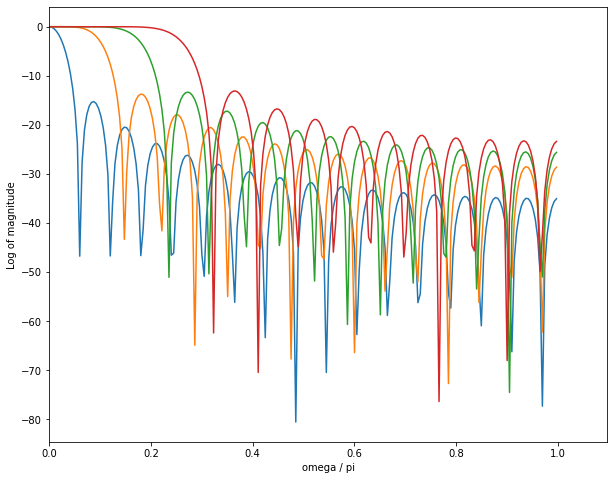

In [82]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq, group.h_db, label = group.N)
    
plt.ylabel("Log of magnitude")
plt.xlabel("omega / pi")
plt.xlim(left=0)
plt.show()

# Primeira ordem

In [83]:
M = 16
N = 12

df = pd.DataFrame()
for N in range(2, M-1, 4):
    num_dados = 2*M + 1
    grau = N + 1

    h = filter_coef(num_dados=num_dados, grau=grau, derivada=1)
    res = np.convolve([int(i==0) for i in range(-200, 201)], h)

    h = fftshift(fft(res))
    f = fftshift(fftfreq(h.shape[0]))
    h_db = 10*np.log(np.abs(h))
    

    _df = pd.DataFrame({"freq": f*2,
                        "h_db": h_db})
    _df["N"] = N
    _df["M"] = M
    df = pd.concat([df, _df], ignore_index=True)

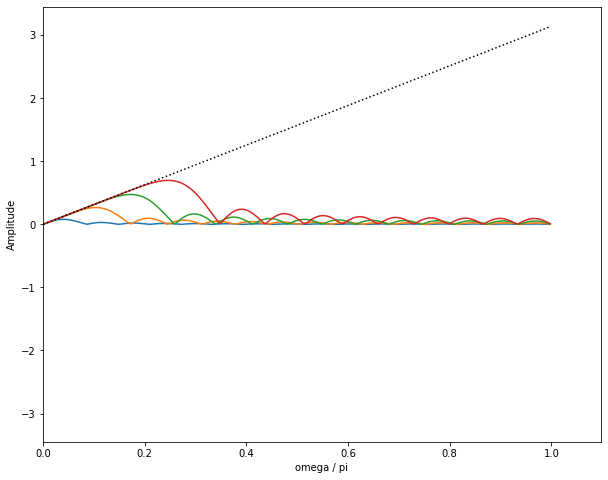

In [84]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq, np.exp(group.h_db/10), label = group.N)
    
plt.plot(group.freq, group.freq*np.pi, color="black", linestyle="dotted")
plt.ylabel("Amplitude")
plt.xlabel("omega / pi")
plt.xlim(left=0)
plt.show()

/home/felipeangelim/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/felipeangelim/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/felipeangelim/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/felipeangelim/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


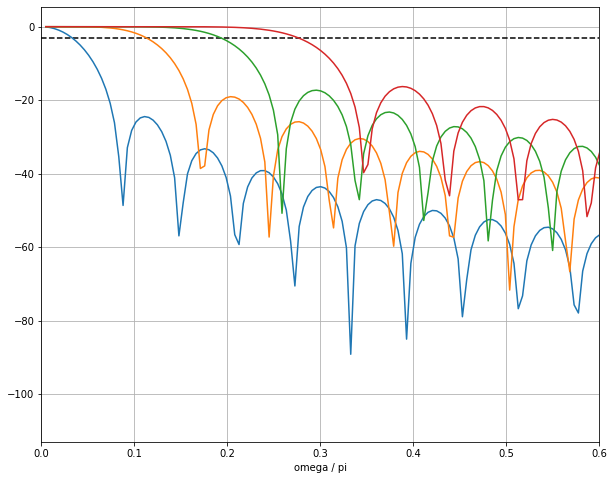

In [85]:
plt.figure(figsize=(10, 8))
plt.hlines(y=-3, xmin=0, xmax=df.freq.max(), linestyle="dashed", color="black")

for (N, M), group in df.groupby(["N", "M"]):
    ratio = np.exp(group.h_db/10)/(group.freq*np.pi)
    
    plt.plot(group.freq, 10*np.log(ratio), label = group.N)
    

#plt.plot(group.freq, , color="black", linestyle="dotted")
plt.xlabel("omega / pi")
#plt.ylim(bottom=0, top=0.6)
plt.xlim(left=0, right=0.6)
plt.grid()
plt.show()

# 2a ordem

In [86]:
M = 16
N = 12

df = pd.DataFrame()
for N in range(2, M-1, 4):
    num_dados = 2*M + 1
    grau = N + 1

    h = filter_coef(num_dados=num_dados, grau=grau, derivada=2)
    res = np.convolve([int(i==0) for i in range(-200, 201)], h)

    h = fftshift(fft(res))
    f = fftshift(fftfreq(h.shape[0]))
    h_db = 10*np.log(np.abs(h))
    

    _df = pd.DataFrame({"freq": f*2,
                        "h_db": h_db})
    _df["N"] = N
    _df["M"] = M
    df = pd.concat([df, _df], ignore_index=True)

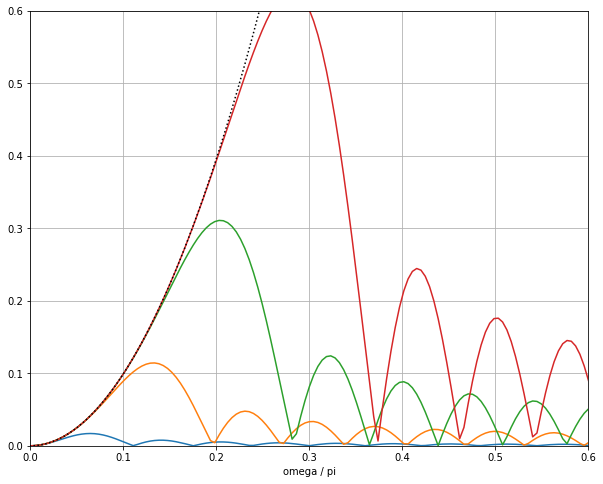

In [87]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq, np.exp(group.h_db/10), label = group.N)
    
    
plt.plot(group.freq, np.square(group.freq*np.pi), color="black", linestyle="dotted")
plt.xlabel("omega / pi")
plt.ylim(bottom=0, top=0.6)
plt.xlim(left=0, right=0.6)
plt.grid()
plt.show()

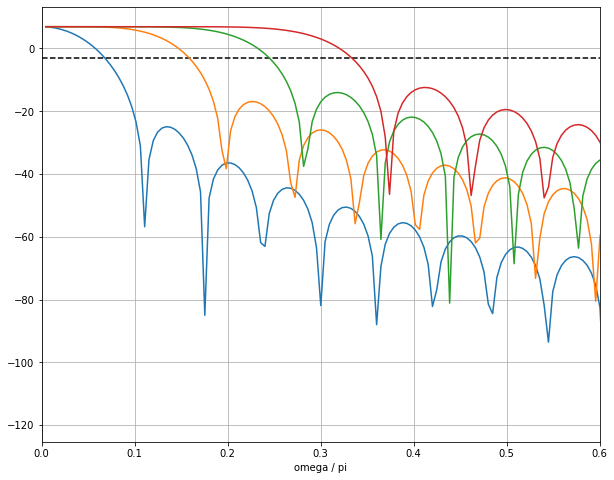

In [88]:
plt.figure(figsize=(10, 8))
plt.hlines(y=-3, xmin=0, xmax=df.freq.max(), linestyle="dashed", color="black")

for (N, M), group in df.groupby(["N", "M"]):
    ratio = np.exp(group.h_db/10)/(np.square(group.freq*np.pi)/2)
    
    plt.plot(group.freq, 10*np.log(ratio), label = group.N)
    

#plt.plot(group.freq, , color="black", linestyle="dotted")
plt.xlabel("omega / pi")
#plt.ylim(bottom=0, top=0.6)
plt.xlim(left=0, right=0.6)
plt.grid()
plt.show()

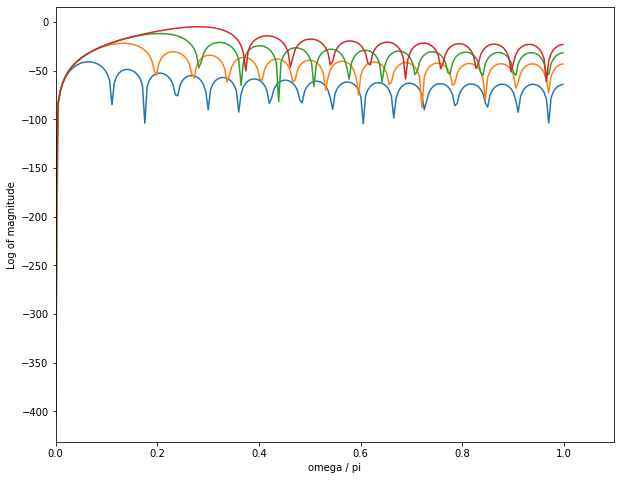

In [89]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq,group.h_db, label = group.N)

plt.ylabel("Log of magnitude")
plt.xlabel("omega / pi")
plt.xlim(left=0)
plt.show()

In [90]:
M = 16
N = 12

df = pd.DataFrame()
for N in range(2, M-1, 4):
    num_dados = 2*M + 1
    grau = N + 1

    h = filter_coef(num_dados=num_dados, grau=grau, derivada=1)
    res = np.convolve([int(i==0) for i in range(-200, 201)], h)

    h = fftshift(fft(res))
    f = fftshift(fftfreq(h.shape[0]))
    h_db = 10*np.log(np.abs(h))
    

    _df = pd.DataFrame({"freq": f*2,
                        "h_db": h_db})
    _df["N"] = N
    _df["M"] = M
    df = pd.concat([df, _df], ignore_index=True)

In [19]:
derivative_matrix = np.zeros((grau, num_ ))

NameError: name 'num_' is not defined

# Noise

In [64]:
1/35*np.array([-3, 12, 17, 12, -3])

array([-0.08571429,  0.34285714,  0.48571429,  0.34285714, -0.08571429])

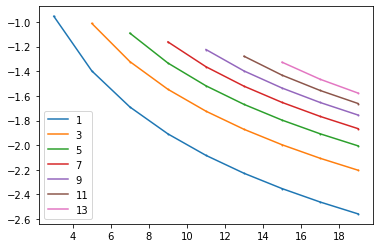

In [80]:
for grau in range(1,15, 2):
    factors = []
    Ns = []
    for i in range(grau+2, 20, 2):

        factor = np.square(filter_coef(num_dados=i,grau=grau)).mean()
        factors.append(factor)
        Ns.append(i)
    plt.plot(Ns, np.log10(factors), label=grau)    
    plt.scatter(Ns, np.log10(factors), s=1)

plt.legend()
plt.show()

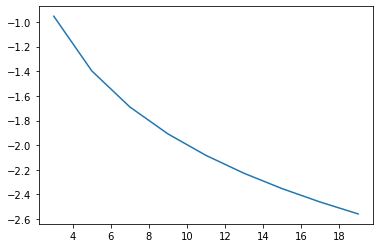

In [61]:
plt.plot(Ns, np.log10(factors)